## **Importando dados**

In [ ]:
import pandas as pd
import csv

uri = 'cardio_train.csv' # disponível em https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
dados = pd.read_csv(uri, delimiter=';')

## **Tratando e transformando dados**

## **Modelos preditórios**

In [ ]:
#Separando o dados que serão usados para treino e para teste

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


x = dados[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'smoke','alco', 'active']]
y = dados['cardio']
x.head()
 

SEED = 20

rawTreinoX, rawTesteX, treinoY, testeY = train_test_split(x, y, random_state  = SEED, stratify = y, test_size = 0.25)

In [ ]:
'''
Dummy Classifier é um modelo de predição 'burro', ele constroi seu modelo através de simples regras. 
Isso é usado para criar uma baseline, por exemplo, qualquer modelo tem que ser melhor que esse, é um
medida minima para precisão.
'''

from sklearn.dummy import DummyClassifier

dummyStratified = DummyClassifier()
dummyStratified.fit(rawTreinoX, treinoY)

previsoes = dummyStratified.predict(rawTesteX)
print("A acurácia alcançada pelo modelo Dummy Stratified foi %.2f%%" % (accuracy_score(testeY, previsoes) * 100))


A acurácia alcançada pelo modelo Dummy Stratified foi 50.54%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
#Esse é o modelo SVC usando os dados 'crus', antes de balancear como farei e explicarei na célula adiante. 

modeloSVCraw = SVC() 
modeloSVCraw.fit(rawTreinoX, treinoY)

print("A acurácia alcançada pelo modelo SVC cru foi %.2f%%" % (accuracy_score(testeY, modeloSVCraw.predict(rawTesteX)) * 100))
previsaoModeloSVCraw = (accuracy_score(testeY, modeloSVCraw.predict(rawTesteX))

A acurácia alcançada pelo modelo SVC cru foi 60.49%


In [ ]:
'''
  O escalonameto de dados é feito para alcançar uma maior precisão na predição, isso ajuda o algoritmo 
  ponderar o peso de cada feature na sua tabela, por exemplo, nessa própra tabela que estamos trabalhando
  há o valor de idade em dias, que na maioria dos casos fica entre 15k ~ 20k, e a pressão sanguinea,
  que nesse caso é representada por 1: normal, 2: acima do normal, 3: muito acima do normal. 
  O StandardScaler() transforma todos os valores, tipicamente, entre [0,1] ou [-1,1].
'''

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(rawTreinoX)
treinoX = scaler.transform(rawTreinoX)
testeX = scaler.transform(rawTesteX)

modeloSVCsca = SVC() 
modeloSVCsca.fit(treinoX, treinoY)


print("A acurácia alcançada pelo modelo SVC escalado uniformemente foi %.2f%%" % (accuracy_score(testeY, modeloSVCsca.predict(testeX)) * 100))
previsaoModeloSVCsca = (accuracy_score(testeY, modeloSVCsca.predict(testeX))



A acurácia alcançada pelo modelo SVC escalado uniformemente foi 72.69%


## **Analisando a árvore de decisão (Decision Tree)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modeloDTREE = DecisionTreeClassifier(max_depth=3) 
modeloDTREE.fit(rawTreinoX, treinoY)

print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treinoX), len(testeX)))

print("A acurácia alcançada pelo modelo DecisionTreeClassifier escalado uniformemente foi %.2f%%" % (accuracy_score(testeY, modeloDTREE.predict(rawTesteX)) * 100))

Treinaremos com 52500 elementos e testaremos com 17500 elementos
A acurácia alcançada pelo modelo DecisionTreeClassifier escalado uniformemente foi 72.33%


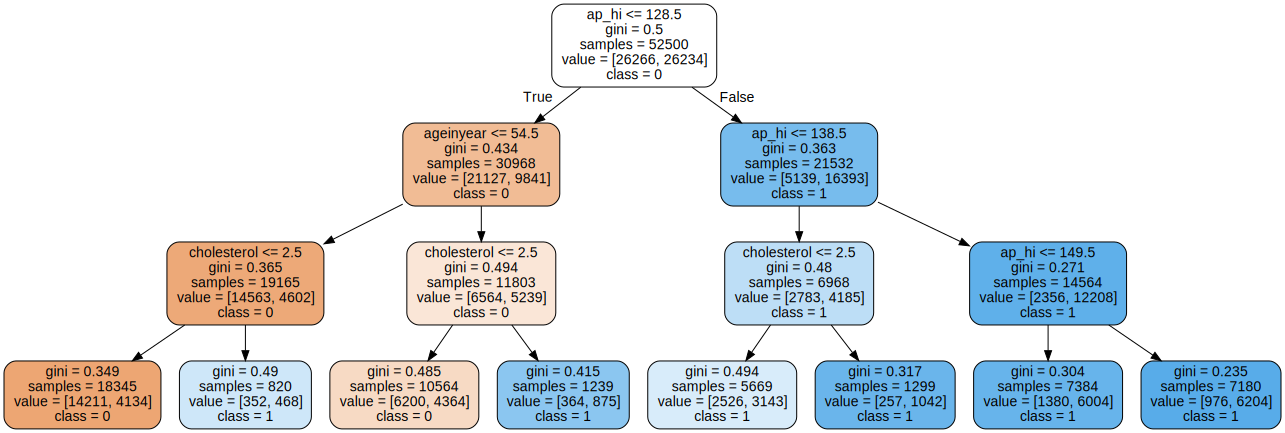

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modeloDTREE, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ['0', '1'])

grafico = graphviz.Source(dot_data)
grafico
##aparentemente todos ap_hi <= 128.5 acabam recebendo 1

In [ ]:
dadosDF = pd.DataFrame(dados)

print( 'Apenas %.2f%% dos casos com a pressão diastólica maior que 128.5 não tem problemas, como podemos ver na árvore de decisão a tendência'
     %(((dadosDF[(dadosDF['cardio'] == 0) & (dadosDF['ap_hi'] > 128.5)].value_counts().sum())/(len(dadosDF)))*100)
      )


Apenas 9.81% dos casos com a pressão diastólica maior que 128.5 não tem problemas, como podemos ver na árvore de decisão a tendência


## **Entrada de dados únicos para predição**

In [ ]:
def preverSVCsca(caso):
  previsao = (modeloSVCsca.predict(caso))

  if previsao == 0:
    print('Há uma possibilidade de %.2f%% de você não ter problemas cardiovasculares.' %(accuracy_score(testeY, previsaoModeloSVCsca) * 100), previsoes)
  else:
    print('Há uma possibilidade de %.2f%% de você ter problemas cardiovasculares.' %(accuracy_score(testeY, previsaoModeloSVCsca) * 100), previsoes)

def preverSVCraw(caso):
  previsao = (modeloSVCraw.predict(caso))

  if previsao == 0:
    print('Há uma possibilidade de %.2f%% de você não ter problemas cardiovasculares.' %(accuracy_score(testeY, previsaoModeloSVCraw) * 100), previsoes)
  else:
    print('Há uma possibilidade de %.2f%% de você ter problemas cardiovasculares.' %(accuracy_score(testeY, previsaoModeloSVCraw) * 100), previsoes)

In [ ]:
'''
 Para prever com o modeloSVCsca use preverSVCsca()
 Para prever com o modeloSVCraw use preverSVCraw()

 Exemplo de entrada: [['1', '156', '56.0', '100', '60', '1', '1', '0', '0', '0', '48']]
'''
